# Desafio - Estatísticas para Devs

Com base nas aulas do módulo de Estatística, utilize os métodos da biblioteca Pandas para tratar o dicionário abaixo e:
1. Trazer a média das vendas
2. Criar um gráfico de barras vertical mostrando o mês de referência e o valor
3. Criar um gráfico de linhas mostrando o mês de referência e o valor.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
# Dicionário de faturamento
dict_faturamento = {
    'data_ref': [
        '2023-01-01', 
        '2020-02-01', 
        '2021-03-01', 
        '2022-04-01', 
        '2023-05-01',
        '2023-06-01', 
        '2020-07-01', 
        '2021-08-01', 
        '2022-09-01', 
        '2023-10-01',
        '2022-11-01', 
        '2023-12-01',
        ],
    'valor': [
        400000, 
        890000, 
        760000, 
        430000, 
        920000,
        340000, 
        800000, 
        500000, 
        200000, 
        900000,
        570000, 
        995000,
        ]
}

In [101]:
# Transformando o dicionário em um DataFrame e renomeando as colunas
df = pd.DataFrame(dict_faturamento)
df.rename(columns={'data_ref': 'date', 'valor': 'value'}, inplace=True)

# Convertendo a coluna 'date' para o tipo 'datetime'
df['date'] = pd.to_datetime(df['date'])

# Criando uma nova coluna 'value_k' com o 'value' dividido por 1000
df['value_k'] = df['value'] / 1000
df['value_k'] = df['value_k'].astype(int)

# Definindo o campo 'date' como o índice e realizando a reordenação dos dados
df.set_index('date', inplace=True)
df.sort_index(ascending=True, inplace=True)

In [102]:
from enum import Enum

# Criando enum para definir o tipo de gráfico
class ChartType(Enum):
    BAR = 1
    LINE = 2

# Criando função para plotar o gráfico
def plot_billing_chart(x: pd.DatetimeIndex, y: pd.Series, chart_type = ChartType.LINE):
    # Definindo os valores de apresentação nos gráficos referente ao eixo 'y'
    y_ticks_range = range(0, (y.max() + 200), 200)
    y_ticks_range_formatted = [f'{x}K' for x in y_ticks_range]

    # Definindo a cor padrão e opacidade para cada tipo de gráfico 
    color = '#111112'
    bar_alpha = 1.0 if chart_type == ChartType.BAR else 0.02
    line_alpha = 1.0 if chart_type == ChartType.LINE else 0.02

    # Criando e configurando o gráfico
    plt.figure(figsize=(14, 6))
    plt.bar(x.strftime('%m/%Y'), y, color=color, alpha=bar_alpha)
    plt.plot(x.strftime('%m/%Y'), y, color=color, alpha=line_alpha)
    plt.title('Faturamento')
    plt.xlabel('Mês/Ano')
    plt.ylabel('Valor (R$)')
    plt.yticks(y_ticks_range, y_ticks_range_formatted)
    plt.show()
    

## 1. Média das vendas


In [103]:
# Calculando a média das vendas
mean = df['value'].mean().__round__(2)
print(f'Média das vendas: R$ {mean}')

Média das vendas: R$ 642083.33


## 2. Gráfico de barras vertical mostrando o mês de referência e o valor

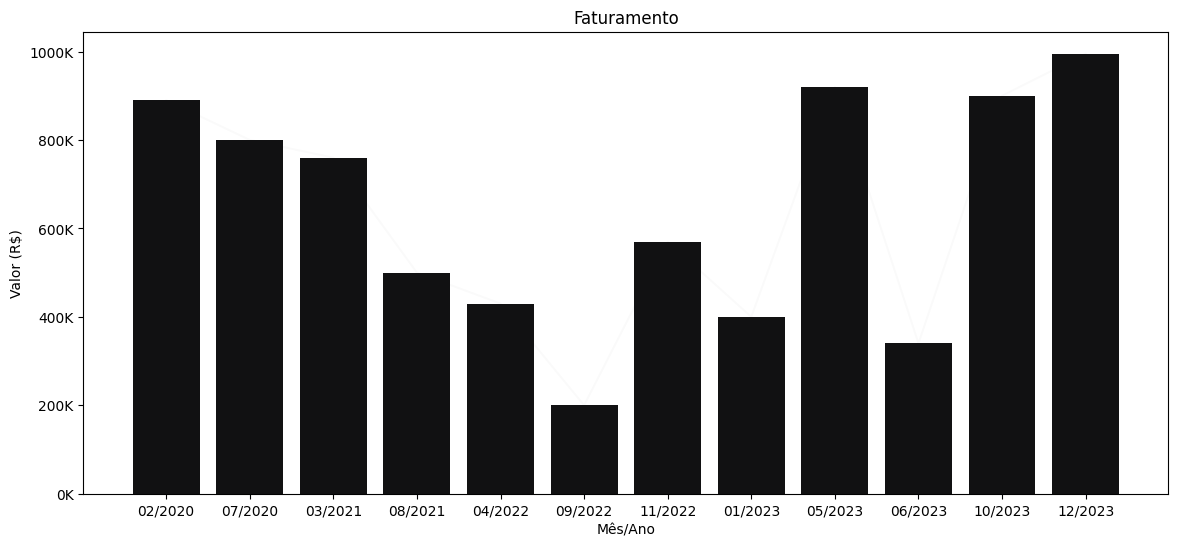

In [104]:
plot_billing_chart(x=df.index, y=df['value_k'], chart_type=ChartType.BAR)

## 3. Gráfico de linhas mostrando o mês de referência e o valor.

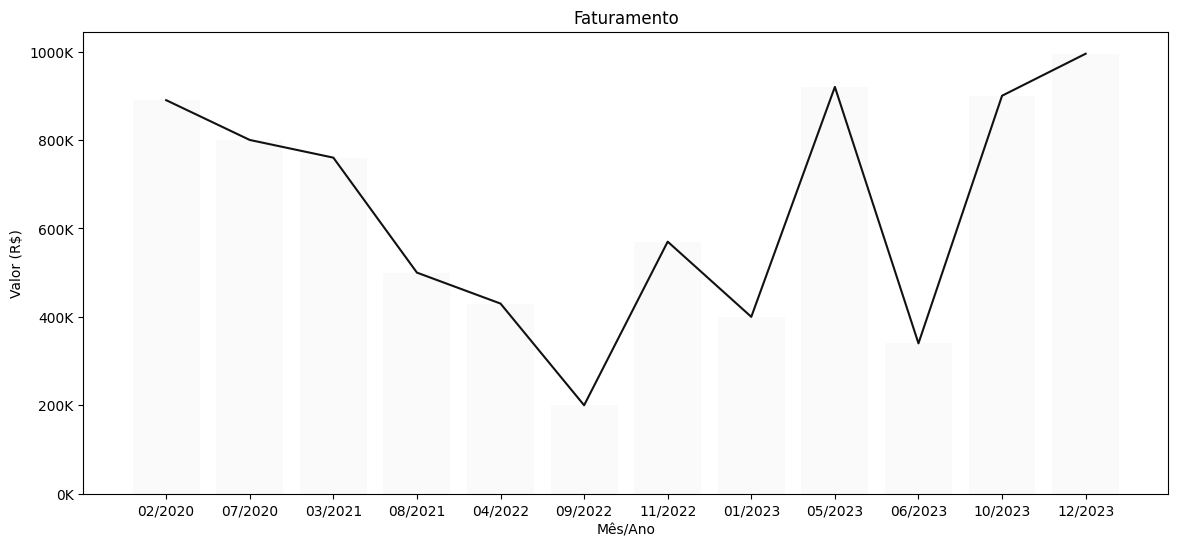

In [105]:
plot_billing_chart(x=df.index, y=df['value_k'], chart_type=ChartType.LINE)